In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk

In [2]:
#Importing the data
game = pd.read_csv('/Users/rebeccaswedberg/Downloads/game_data/game_reviews.csv')

game.head()

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
0,2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400,NaN
1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,1474156800,NaN
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",1473638400,NaN
3,5,True,"03 02, 2017",A139PXTTC2LGHZ,Ashley,Amazing buy! Bought it as a gift for our new d...,Five Stars,1488412800,NaN
4,1,True,"02 08, 2017",A3IB33V29XIL8O,Oghma_EM,As my review of GF9's previous screens these w...,Money trap,1486512000,NaN


In [3]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
overall           15000 non-null int64
verified          15000 non-null bool
reviewTime        15000 non-null object
reviewerID        15000 non-null object
reviewerName      15000 non-null object
reviewText        14990 non-null object
summary           14998 non-null object
unixReviewTime    15000 non-null int64
image             160 non-null object
dtypes: bool(1), int64(2), object(6)
memory usage: 952.3+ KB


In [4]:
#Lower case for all words in review Text column, this is the data we will be analyzing 

game['reviewText'] = game['reviewText'].astype(str).str.lower()
game.head(3)

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
0,2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,"when it comes to a dm's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400,NaN
1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,an open letter to galeforce9*:\n\nyour unpaint...,Another worthless Dungeon Master's screen from...,1474156800,NaN
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,"nice art, nice printing. why two panels are f...","pretty, but also pretty useless",1473638400,NaN


In [5]:
#Dropping the Image column given NaN values and we dont need it 

game2= game.drop(columns =['image'])
game2.head(3)

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime
0,2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,"when it comes to a dm's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400
1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,an open letter to galeforce9*:\n\nyour unpaint...,Another worthless Dungeon Master's screen from...,1474156800
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,"nice art, nice printing. why two panels are f...","pretty, but also pretty useless",1473638400


In [10]:
#dropping rows with NA for reviewText column

game2.dropna(subset=['reviewText'], inplace=True)
game2.shape

(15000, 9)

In [6]:
#Tokenizing the data 
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

game2['text_token']=game2['reviewText'].apply(regexp.tokenize)
game2.head(3)

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,text_token
0,2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,"when it comes to a dm's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400,"[when, it, comes, to, a, dm, s, screen, the, s..."
1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,an open letter to galeforce9*:\n\nyour unpaint...,Another worthless Dungeon Master's screen from...,1474156800,"[an, open, letter, to, galeforce9, your, unpai..."
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,"nice art, nice printing. why two panels are f...","pretty, but also pretty useless",1473638400,"[nice, art, nice, printing, why, two, panels, ..."


In [11]:
# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")


In [12]:
# Remove stopwords
game2['text_token'] = game2['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
game2.head(3)

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,text_token
0,2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,"when it comes to a dm's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400,"[comes, dm, screen, space, screen, absolute, p..."
1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,an open letter to galeforce9*:\n\nyour unpaint...,Another worthless Dungeon Master's screen from...,1474156800,"[open, letter, galeforce9, unpainted, miniatur..."
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,"nice art, nice printing. why two panels are f...","pretty, but also pretty useless",1473638400,"[nice, art, nice, printing, two, panels, fille..."


In [13]:
#Keeping the words with more than 2 letters 
game2['text_string'] = game2['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))


In [14]:
all_words = ' '.join([word for word in game2['text_string']])

In [15]:
#tokenize the words 
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [18]:
from nltk import FreqDist

fdist = FreqDist(tokenized_words)


In [19]:
game2['text_string_fdist'] = game2['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))

In [20]:
game2.head()

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,text_token,text_string,text_string_fdist
0,2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,"when it comes to a dm's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400,"[comes, dm, screen, space, screen, absolute, p...",comes screen space screen absolute premium fac...,comes screen space screen absolute premium fac...
1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,an open letter to galeforce9*:\n\nyour unpaint...,Another worthless Dungeon Master's screen from...,1474156800,"[open, letter, galeforce9, unpainted, miniatur...",open letter galeforce9 unpainted miniatures ba...,open letter galeforce9 unpainted miniatures ba...
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,"nice art, nice printing. why two panels are f...","pretty, but also pretty useless",1473638400,"[nice, art, nice, printing, two, panels, fille...",nice art nice printing two panels filled gener...,nice art nice printing two panels filled gener...
3,5,True,"03 02, 2017",A139PXTTC2LGHZ,Ashley,amazing buy! bought it as a gift for our new d...,Five Stars,1488412800,"[amazing, buy, bought, gift, new, dm, perfect]",amazing buy bought gift new perfect,amazing buy bought gift new perfect
4,1,True,"02 08, 2017",A3IB33V29XIL8O,Oghma_EM,as my review of gf9's previous screens these w...,Money trap,1486512000,"[review, gf9, previous, screens, completely, u...",review gf9 previous screens completely unneces...,review gf9 previous screens completely unneces...


In [21]:
#Lemmatization 

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rebeccaswedberg/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
wordnet_lem = WordNetLemmatizer()

game2['text_string_lem'] = game2['text_string_fdist'].apply(wordnet_lem.lemmatize)

In [23]:
game2.head()

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,text_token,text_string,text_string_fdist,text_string_lem
0,2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,"when it comes to a dm's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400,"[comes, dm, screen, space, screen, absolute, p...",comes screen space screen absolute premium fac...,comes screen space screen absolute premium fac...,comes screen space screen absolute premium fac...
1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,an open letter to galeforce9*:\n\nyour unpaint...,Another worthless Dungeon Master's screen from...,1474156800,"[open, letter, galeforce9, unpainted, miniatur...",open letter galeforce9 unpainted miniatures ba...,open letter galeforce9 unpainted miniatures ba...,open letter galeforce9 unpainted miniatures ba...
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,"nice art, nice printing. why two panels are f...","pretty, but also pretty useless",1473638400,"[nice, art, nice, printing, two, panels, fille...",nice art nice printing two panels filled gener...,nice art nice printing two panels filled gener...,nice art nice printing two panels filled gener...
3,5,True,"03 02, 2017",A139PXTTC2LGHZ,Ashley,amazing buy! bought it as a gift for our new d...,Five Stars,1488412800,"[amazing, buy, bought, gift, new, dm, perfect]",amazing buy bought gift new perfect,amazing buy bought gift new perfect,amazing buy bought gift new perfect
4,1,True,"02 08, 2017",A3IB33V29XIL8O,Oghma_EM,as my review of gf9's previous screens these w...,Money trap,1486512000,"[review, gf9, previous, screens, completely, u...",review gf9 previous screens completely unneces...,review gf9 previous screens completely unneces...,review gf9 previous screens completely unneces...


In [24]:
all_words_lem = ' '.join([word for word in game2['text_string_lem']])

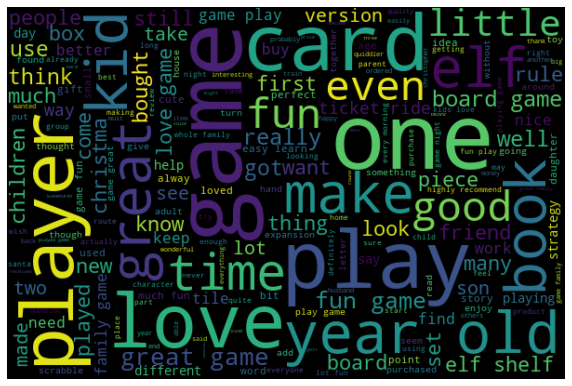

In [25]:
# Creating a word cloud 
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [26]:
words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

In [27]:
#Top 5 most common words used to describe our products 
fd.most_common(5)

[('game', 12880),
 ('fun', 5407),
 ('great', 4353),
 ('play', 4192),
 ('elf', 3397)]

# Sentiment Analysis

In [28]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rebeccaswedberg/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [30]:
#Using polarity scores 
game2['polarity'] = game2['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
game2.head(3)

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,text_token,text_string,text_string_fdist,text_string_lem,polarity
0,2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,"when it comes to a dm's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400,"[comes, dm, screen, space, screen, absolute, p...",comes screen space screen absolute premium fac...,comes screen space screen absolute premium fac...,comes screen space screen absolute premium fac...,"{'neg': 0.298, 'neu': 0.653, 'pos': 0.049, 'co..."
1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,an open letter to galeforce9*:\n\nyour unpaint...,Another worthless Dungeon Master's screen from...,1474156800,"[open, letter, galeforce9, unpainted, miniatur...",open letter galeforce9 unpainted miniatures ba...,open letter galeforce9 unpainted miniatures ba...,open letter galeforce9 unpainted miniatures ba...,"{'neg': 0.243, 'neu': 0.506, 'pos': 0.251, 'co..."
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,"nice art, nice printing. why two panels are f...","pretty, but also pretty useless",1473638400,"[nice, art, nice, printing, two, panels, fille...",nice art nice printing two panels filled gener...,nice art nice printing two panels filled gener...,nice art nice printing two panels filled gener...,"{'neg': 0.184, 'neu': 0.582, 'pos': 0.234, 'co..."


In [31]:
# Change data structure, removing unwanted columns 
game2 = pd.concat(
    [game2.drop(['unixReviewTime','reviewerName', 'polarity'], axis=1), 
     game2['polarity'].apply(pd.Series)], axis=1)
game2.head(3)

,overall,verified,reviewTime,reviewerID,reviewText,summary,text_token,text_string,text_string_fdist,text_string_lem,neg,neu,pos,compound
0,2,False,"09 22, 2016",A1IDMI31WEANAF,"when it comes to a dm's screen, the space on t...",The fact that 50% of this space is wasted on a...,"[comes, dm, screen, space, screen, absolute, p...",comes screen space screen absolute premium fac...,comes screen space screen absolute premium fac...,comes screen space screen absolute premium fac...,0.298,0.653,0.049,-0.8932
1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,an open letter to galeforce9*:\n\nyour unpaint...,Another worthless Dungeon Master's screen from...,"[open, letter, galeforce9, unpainted, miniatur...",open letter galeforce9 unpainted miniatures ba...,open letter galeforce9 unpainted miniatures ba...,open letter galeforce9 unpainted miniatures ba...,0.243,0.506,0.251,0.2023
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,"nice art, nice printing. why two panels are f...","pretty, but also pretty useless","[nice, art, nice, printing, two, panels, fille...",nice art nice printing two panels filled gener...,nice art nice printing two panels filled gener...,nice art nice printing two panels filled gener...,0.184,0.582,0.234,0.7281


In [32]:
# Create new variable with sentiment "neutral," "positive" and "negative"
game2['sentiment'] = game2['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
game2.head(4)

,overall,verified,reviewTime,reviewerID,reviewText,summary,text_token,text_string,text_string_fdist,text_string_lem,neg,neu,pos,compound,sentiment
0,2,False,"09 22, 2016",A1IDMI31WEANAF,"when it comes to a dm's screen, the space on t...",The fact that 50% of this space is wasted on a...,"[comes, dm, screen, space, screen, absolute, p...",comes screen space screen absolute premium fac...,comes screen space screen absolute premium fac...,comes screen space screen absolute premium fac...,0.298,0.653,0.049,-0.8932,negative
1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,an open letter to galeforce9*:\n\nyour unpaint...,Another worthless Dungeon Master's screen from...,"[open, letter, galeforce9, unpainted, miniatur...",open letter galeforce9 unpainted miniatures ba...,open letter galeforce9 unpainted miniatures ba...,open letter galeforce9 unpainted miniatures ba...,0.243,0.506,0.251,0.2023,positive
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,"nice art, nice printing. why two panels are f...","pretty, but also pretty useless","[nice, art, nice, printing, two, panels, fille...",nice art nice printing two panels filled gener...,nice art nice printing two panels filled gener...,nice art nice printing two panels filled gener...,0.184,0.582,0.234,0.7281,positive
3,5,True,"03 02, 2017",A139PXTTC2LGHZ,amazing buy! bought it as a gift for our new d...,Five Stars,"[amazing, buy, bought, gift, new, dm, perfect]",amazing buy bought gift new perfect,amazing buy bought gift new perfect,amazing buy bought gift new perfect,0.000,0.224,0.776,0.8860,positive


# Top 20 Positive Reviews


In [34]:
top20postitiveRevs = game2.sort_values(by='pos', ascending=False)
top20postitiveRevs.head(20)

,overall,verified,reviewTime,reviewerID,reviewText,summary,text_token,text_string,text_string_fdist,text_string_lem,neg,neu,pos,compound,sentiment
8410,5,True,"11 17, 2016",A1LZT5TXMHVJE8,super cute!,A new Christmas tradition for me!,"[super, cute]",super cute,super cute,super cute,0.0,0.0,1.0,0.7845,positive
11982,5,True,"10 8, 2016",A3BZFRA760G7UD,great.,Five Stars,[great],great,great,great,0.0,0.0,1.0,0.6249,positive
8738,5,False,"12 6, 2015",AZNC58IU8VIVR,love it,Five Stars,[love],love,love,love,0.0,0.0,1.0,0.6369,positive
8742,5,True,"12 6, 2015",A357Y8XVPDW3D3,great gift,Five Stars,"[great, gift]",great gift,great gift,great gift,0.0,0.0,1.0,0.7906,positive
12001,4,True,"06 14, 2015",A1A1YKECE5OYF2,well worth it,Four Stars,"[well, worth]",well worth,well worth,well worth,0.0,0.0,1.0,0.4588,positive
8744,5,True,"12 6, 2015",A2U927ABCSPMUZ,love it.,Five Stars,[love],love,love,love,0.0,0.0,1.0,0.6369,positive
11993,5,True,"01 19, 2016",A3V44CJHKLIDEW,great,Five Stars,[great],great,great,great,0.0,0.0,1.0,0.6249,positive
11992,5,True,"02 08, 2016",A3UHDCFCG721R,great,Five Stars,[great],great,great,great,0.0,0.0,1.0,0.6249,positive
576,5,True,"09 04, 2014",A2PZHT6ONFD5NZ,great.,Five Stars,[great],great,great,great,0.0,0.0,1.0,0.6249,positive
8749,5,True,"12 5, 2015",A2FYFT0NBMT3E7,great!,Five Stars,[great],great,great,great,0.0,0.0,1.0,0.6249,positive


In [40]:
top20postitiveRevs[['reviewText','summary']].head(20)

,reviewText,summary
8410,super cute!,A new Christmas tradition for me!
11982,great.,Five Stars
8738,love it,Five Stars
8742,great gift,Five Stars
12001,well worth it,Four Stars
8744,love it.,Five Stars
11993,great,Five Stars
11992,great,Five Stars
576,great.,Five Stars
8749,great!,Five Stars


# Top 20 Negative Reviews 

In [35]:
top20negativeRevs = game2.sort_values(by='neg', ascending=False)
top20negativeRevs.head(20)

,overall,verified,reviewTime,reviewerID,reviewText,summary,text_token,text_string,text_string_fdist,text_string_lem,neg,neu,pos,compound,sentiment
9055,5,True,"01 27, 2015",A3DZPCTKZD0M1X,this is scary!,Scary!,[scary],scary,scary,scary,1.000,0.000,0.00,-0.4939,negative
301,3,True,"04 08, 2015",AMU9DXKHYUPX1,difficult,Three Stars,[difficult],difficult,difficult,difficult,1.000,0.000,0.00,-0.3612,negative
3339,1,False,"01 22, 2017",A22S3YLO8E5ZZ3,gross,Nasty,[gross],gross,gross,gross,1.000,0.000,0.00,-0.4767,negative
9260,1,True,"12 27, 2014",AUBU47RORRSMB,just stupid.,One Star,[stupid],stupid,stupid,stupid,1.000,0.000,0.00,-0.5267,negative
14104,5,True,"05 04, 2015",AHBHFK1H9P41U,no problems,Five Stars,[problems],problems,problems,problem,1.000,0.000,0.00,-0.4019,negative
3532,1,True,"03 12, 2015",A31AJ70ZUX1U1H,disappointment,Disappointing,[disappointment],disappointment,disappointment,disappointment,1.000,0.000,0.00,-0.5106,negative
11507,3,True,"10 5, 2015",A1M0HDB8J1XQB7,nothing great; fair.,Three Stars,"[nothing, great, fair]",nothing great fair,nothing great fair,nothing great fair,0.840,0.160,0.00,-0.6435,negative
3359,1,True,"06 02, 2016",A29ZPOASXZI493,some of the suggestions are disgusting,One Star,"[suggestions, disgusting]",suggestions disgusting,suggestions disgusting,suggestions disgusting,0.773,0.227,0.00,-0.5267,negative
4004,5,False,"12 6, 2017",A2GVFY5KP1LP0R,can't go wrong with this boardgame,Five Stars,"[go, wrong, boardgame]",wrong boardgame,wrong boardgame,wrong boardgame,0.756,0.244,0.00,-0.4767,negative
9082,5,True,"01 15, 2015",A2XRRYUVARCZWG,can't go wrong with the elf!,Five Stars,"[go, wrong, elf]",wrong elf,wrong elf,wrong elf,0.756,0.244,0.00,-0.4767,negative


In [39]:
top20negativeRevs[['reviewText', 'summary']].head(20)

,reviewText,summary
9055,this is scary!,Scary!
301,difficult,Three Stars
3339,gross,Nasty
9260,just stupid.,One Star
14104,no problems,Five Stars
3532,disappointment,Disappointing
11507,nothing great; fair.,Three Stars
3359,some of the suggestions are disgusting,One Star
4004,can't go wrong with this boardgame,Five Stars
9082,can't go wrong with the elf!,Five Stars


# Overall sentiment

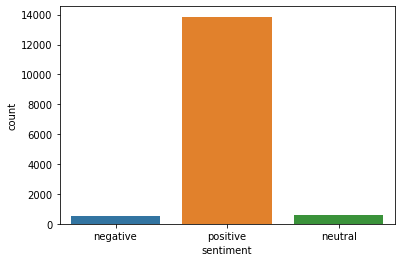

In [44]:
sns.countplot(data=game2,x='sentiment')